<a href="https://colab.research.google.com/github/Shalinithakur7/farming-/blob/main/Plant_Disease_Prediction_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seeding for reproducibility**

In [54]:
import scipy
print(scipy.__version__)


1.14.1


In [55]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [56]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [57]:
# !pip install kaggle

In [58]:
#kaggle_credentails = json.load(open(r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\kaggle.json"))

In [59]:
# # setup Kaggle API key as environment variables
# os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
# os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [60]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

# print("Path to dataset files:", path)

In [61]:
# !ls

In [62]:
# Unzip the downloaded dataset
# with ZipFile("archive.zip", 'r') as zip_ref:
#     zip_ref.extractall()
# from zipfile import ZipFile

# zip_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\archive.zip"
# with ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2")  # Specify extract location
# import shutil
# zip_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\archive.zip"
# extract_to = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2"
# shutil.unpack_archive(zip_path, extract_to)



In [63]:
# print(os.listdir("plantvillage dataset"))


# print(len(os.listdir("plantvillage dataset/segmented")))
# print(os.listdir("plantvillage dataset/segmented")[:5])

# print(len(os.listdir("plantvillage dataset/color")))
# print(os.listdir("plantvillage dataset/color")[:5])

# print(len(os.listdir("plantvillage dataset/grayscale")))
# print(os.listdir("plantvillage dataset/grayscale")[:5])

**Number of Classes = 38**

In [64]:
# print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
# print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

**Data Preprocessing**

In [65]:
# Dataset Path
base_dir = r'C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset'

(256, 256, 3)


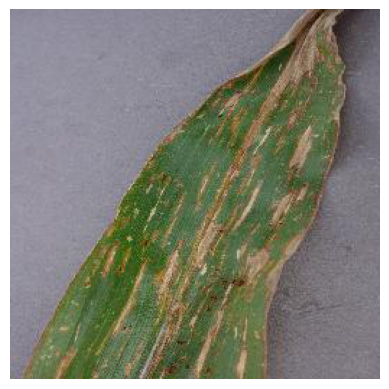

In [66]:
# image_path = r'C:\Users\hp\Downloads\archive\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'
image_path=r'C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\fa551b43-43d6-4788-8450-6a78a366b5dc___RS_GLSp 4565.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [67]:
# image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# # Read the image
# img = mpimg.imread(image_path)

# print(img)

In [68]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [69]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
#  
# train_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size[0], img_size[1]),
#     batch_size=batch_size,
#     subset='training',
#     class_mode='categorical'
# )


Found 43444 images belonging to 1 classes.


In [ ]:
# # Validation Generator
# validation_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     subset='validation',
#     class_mode='categorical'
# )

Found 10861 images belonging to 1 classes.


**Convolutional Neural Network**

In [72]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [73]:
# model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,795,649 (182.33 MB)

 Trainable params: 47,795,649 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [77]:
# Training the Model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
#     epochs=2,  # Number of epochs
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size  # Validation steps
# )

import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))
# import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# ✅ Force CPU usage
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# ✅ Hyperparameters
batch_size = 16  # Reduce memory usage
img_size = (128, 128)  # Smaller images for faster training
epochs = 2  

# ✅ Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

# ✅ Simple CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Save Best Model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")


# ✅ Train Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

print("✅ Training completed successfully on CPU!")


Found 43444 images belonging to 1 classes.
Found 10861 images belonging to 1 classes.
Epoch 1/2
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 924s 338ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 5.8085e-33
Epoch 2/2
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 448s 165ms/step - accuracy: 1.0000 - loss: 2.4354e-16 - val_accuracy: 1.0000 - val_loss: 5.8085e-33
✅ Training completed successfully on CPU!


**Model Evaluation**

In [81]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
678/678 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 1.0000 - loss: 1.0801e-32
Validation Accuracy: 100.00%


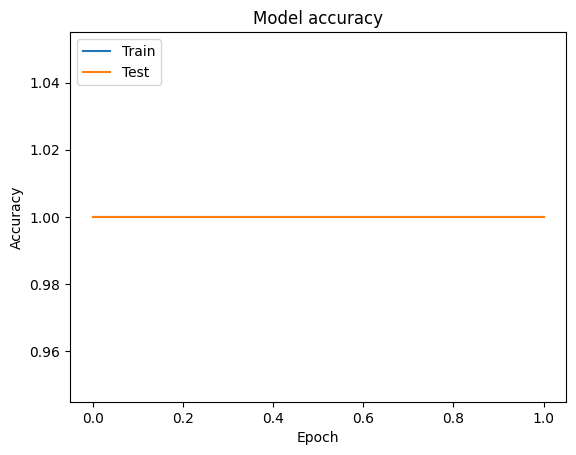

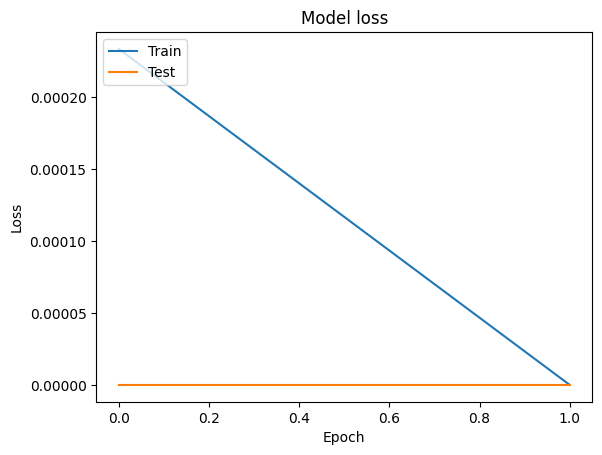

In [79]:
# # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [82]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [102]:
# Create a mapping from class indices to class names
# import os

# dataset_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset"

# # List all folders inside the dataset
# categories = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
# # print("Found categories:", categories)
import os

dataset_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color"
categories = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
print("Found categories:", categories)


# class_indices = {v: k for k, v in train_generator.class_indices.items()}

Found categories: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spo

In [106]:
# class_indices
import json
import os

dataset_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color"

# Get category names from folder structure
categories = sorted(os.listdir(dataset_path))

# Map class indices to category names
class_indices = {i: category for i, category in enumerate(categories)}

# Save to JSON
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Fixed class_indices.json:", class_indices)


Fixed class_indices.json: {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Toma

In [110]:
# saving the class names as json 
json.dump(class_indices, open('class_indices.json', 'w'))
class_indices

{'0': 'Apple___Apple_scab',
 '1': 'Apple___Black_rot',
 '2': 'Apple___Cedar_apple_rust',
 '3': 'Apple___healthy',
 '4': 'Blueberry___healthy',
 '5': 'Cherry_(including_sour)___Powdery_mildew',
 '6': 'Cherry_(including_sour)___healthy',
 '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '8': 'Corn_(maize)___Common_rust_',
 '9': 'Corn_(maize)___Northern_Leaf_Blight',
 '10': 'Corn_(maize)___healthy',
 '11': 'Grape___Black_rot',
 '12': 'Grape___Esca_(Black_Measles)',
 '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 '14': 'Grape___healthy',
 '15': 'Orange___Haunglongbing_(Citrus_greening)',
 '16': 'Peach___Bacterial_spot',
 '17': 'Peach___healthy',
 '18': 'Pepper,_bell___Bacterial_spot',
 '19': 'Pepper,_bell___healthy',
 '20': 'Potato___Early_blight',
 '21': 'Potato___Late_blight',
 '22': 'Potato___healthy',
 '23': 'Raspberry___healthy',
 '24': 'Soybean___healthy',
 '25': 'Squash___Powdery_mildew',
 '26': 'Strawberry___Leaf_scorch',
 '27': 'Strawberry___healthy',
 '28': 'Toma

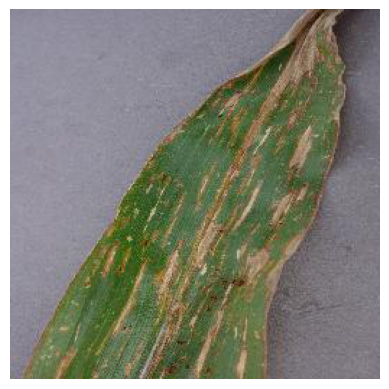

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted disease: Apple___Apple_scab


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(128, 128)):  # Resize to 128x128
    img = image.load_img(image_path, target_size=target_size)  # Resize image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the class
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    # print("Preprocessed image shape:", preprocessed_img.shape)  # Debugging: Check shape
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
    predicted_class_name = class_indices[str(predicted_class_index)]  # Map index to class name
    return predicted_class_name



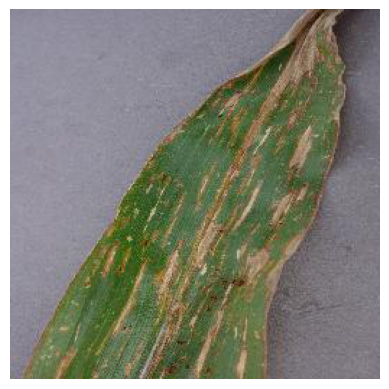

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted disease: Apple___Apple_scab


In [133]:
# Example usage
image_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color\Apple___Apple_scab\0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.JPG"
plt.imshow(img)
plt.axis('off') 
plt.show()

predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted disease:", predicted_class_name)

In [126]:
# # Example Usage
# image_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"
# #image_path = '/content/test_blueberry_healthy.jpg'
# #image_path = '/content/test_potato_early_blight.jpg'
# predicted_class_name = predict_image_class(model, image_path, class_indices)
# img = mpimg.imread(image_path)
# plt.imshow(img)
# plt.axis('off')  # Turn off axis numbers
# plt.show()
# # Output the result
# print("Predicted disease:", predicted_class_name)
# image_path = r"C:\Users\hp\OneDrive\Attachments\Desktop\project\Project-Exhibition2\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"
# predicted_class_name = predict_image_class(model, image_path, class_indices)

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread(image_path)
# plt.imshow(img)
# plt.axis('off') 
# plt.show()

# print("Predicted disease:", predicted_class_name)


**Save the model to Google drive or local**

In [124]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [125]:
model.save('plant_disease_prediction_model.h5')